In [26]:
!pip install epitran gtts playsound


In [27]:
pip install epitran gtts playsound tkinter


ERROR: Could not find a version that satisfies the requirement tkinter (from versions: none)
ERROR: No matching distribution found for tkinter


In [28]:
!pip install phonemizer gtts pydub
!apt-get install espeak-ng -y


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
espeak-ng is already the newest version (1.50+dfsg-10ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


In [29]:
from phonemizer import phonemize
from gtts import gTTS
import os
from IPython.display import Audio, display
def transcribe(text, lang_code):
    """Transcribes the input text into IPA using phonemizer."""
    try:
        ipa_transcription = phonemize(text, language=lang_code, backend="espeak")
        return ipa_transcription
    except Exception as e:
        return f"Error: {str(e)}"
def play_audio(text, lang_code):
    """Plays the audio pronunciation of the input text."""
    try:
        tts = gTTS(text, lang=lang_code[:2])  # Extract first two letters for TTS
        audio_file = "output.mp3"
        tts.save(audio_file)
        display(Audio(audio_file, autoplay=True))  # Plays audio in Colab
    except Exception as e:
        print(f"Error: {str(e)}")
# Get user input
text = input("Enter text to transcribe: ")
lang_code = input("Enter language code (e.g., 'en', 'fr', 'es'): ")

# Play pronunciation
play_audio(text, lang_code)


Enter text to transcribe: Hello World
Enter language code (e.g., 'en', 'fr', 'es'): en


In [30]:
!apt-get install espeak-ng -y


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
espeak-ng is already the newest version (1.50+dfsg-10ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


In [31]:
import subprocess
def transcribe_with_espeak(text, lang_code="en-us"):
    """Transcribes text to IPA using espeak-ng."""
    try:
        result = subprocess.run(["espeak-ng", "-v", lang_code, "--ipa", text], capture_output=True, text=True)
        ipa_transcription = result.stdout.strip()
        return ipa_transcription
    except Exception as e:
        return f"Error: {str(e)}"

# Get user input
text = input("Enter text to transcribe: ")
lang_code = input("Enter language code (e.g., 'en-us', 'fr', 'es'): ")

# Perform transcription
ipa_result = transcribe_with_espeak(text, lang_code)
print(f"IPA Transcription: {ipa_result}")


Enter text to transcribe: Hello World
Enter language code (e.g., 'en-us', 'fr', 'es'): en-us
IPA Transcription: həlˈoʊ wˈɜːld


In [32]:
!pip install jiwer phonemizer


In [33]:
from jiwer import wer, cer
from phonemizer import phonemize
def evaluate_transcription(predicted, reference):
    word_error = wer(reference, predicted)
    char_error = cer(reference, predicted)
    print(f"Word Error Rate (WER): {word_error:.2%}")
    print(f"Character Error Rate (CER): {char_error:.2%}")
# Example Evaluation
reference_ipa = "həˈloʊ wɝld"  # Correct IPA for "Hello World"
predicted_ipa = "həloʊ wɝld"    # Example system output

evaluate_transcription(predicted_ipa, reference_ipa)


Word Error Rate (WER): 50.00%
Character Error Rate (CER): 9.09%


In [34]:
!pip install jiwer phonemizer matplotlib seaborn
!apt-get install espeak-ng -y


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
espeak-ng is already the newest version (1.50+dfsg-10ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


Predicted IPA: həlˈoʊ wˈɜːld
Word Error Rate (WER): 100.00%
Character Error Rate (CER): 45.45%


<ipython-input-35-b30c072e6da6>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette="coolwarm")


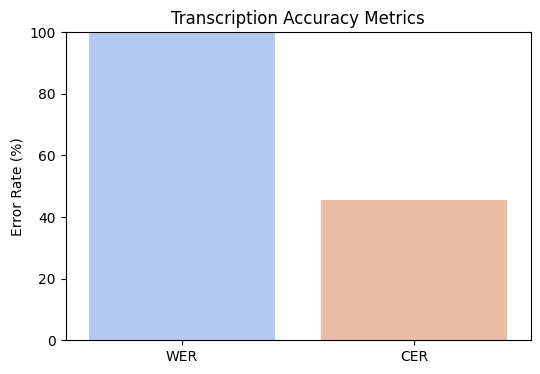

In [35]:
import subprocess
import matplotlib.pyplot as plt
import seaborn as sns
from jiwer import wer, cer

def transcribe_with_espeak(text, lang_code="en-us"):
    """Transcribes text to IPA using espeak-ng."""
    try:
        result = subprocess.run(["espeak-ng", "-v", lang_code, "--ipa", text], capture_output=True, text=True)
        ipa_transcription = result.stdout.strip()
        return ipa_transcription
    except Exception as e:
        return f"Error: {str(e)}"

def evaluate_transcription(predicted, reference):
    """Computes Word Error Rate (WER) and Character Error Rate (CER)."""
    word_error = wer(reference, predicted)
    char_error = cer(reference, predicted)

    print(f"Word Error Rate (WER): {word_error:.2%}")
    print(f"Character Error Rate (CER): {char_error:.2%}")

    return word_error, char_error

def plot_metrics(wer_score, cer_score):
    """Plots WER and CER using a bar chart."""
    metrics = ["WER", "CER"]
    values = [wer_score * 100, cer_score * 100]  # Convert to percentage

    plt.figure(figsize=(6, 4))
    sns.barplot(x=metrics, y=values, palette="coolwarm")
    plt.ylim(0, 100)
    plt.ylabel("Error Rate (%)")
    plt.title("Transcription Accuracy Metrics")
    plt.show()

# Example Input
text = "Hello World"
reference_ipa = "həˈloʊ wɝld"  # Correct IPA for "Hello World"

# Generate IPA transcription
predicted_ipa = transcribe_with_espeak(text, "en-us")
print(f"Predicted IPA: {predicted_ipa}")

# Evaluate transcription
wer_score, cer_score = evaluate_transcription(predicted_ipa, reference_ipa)

# Plot accuracy metrics
plot_metrics(wer_score, cer_score)


In [36]:
!pip install gradio jiwer phonemizer matplotlib seaborn
!apt-get install espeak-ng -y


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
espeak-ng is already the newest version (1.50+dfsg-10ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


In [38]:
import gradio as gr
import epitran
import subprocess
import numpy as np
from gtts import gTTS
from jiwer import wer, cer
import os

# Function to convert text to IPA using Epitran
def convert_to_ipa(text, lang_code):
    try:
        epi = epitran.Epitran(lang_code)
        ipa_transcription = epi.transliterate(text)
        if not ipa_transcription:
            return "Error: IPA transcription failed!"
        return ipa_transcription
    except Exception as e:
        return f"Error: {str(e)}"

# Function to convert text to IPA using Espeak-NG
def transcribe_with_espeak(text, lang_code="en-us"):
    try:
        result = subprocess.run(["espeak-ng", "-v", lang_code, "--ipa", text], capture_output=True, text=True)
        ipa_transcription = result.stdout.strip()
        return ipa_transcription
    except Exception as e:
        return f"Error: {str(e)}"

# Function to generate pronunciation audio
def generate_audio(text, lang_code):
    try:
        tts = gTTS(text, lang=lang_code.split("-")[0])  # Extract base language
        audio_path = "output.mp3"
        tts.save(audio_path)
        return audio_path
    except Exception as e:
        return None

# Function to compute WER & CER
def calculate_error_rates(predicted_ipa, reference_ipa):
    if not reference_ipa:
        return None, None
    wer_score = wer(reference_ipa, predicted_ipa)
    cer_score = cer(reference_ipa, predicted_ipa)
    return round(wer_score, 4), round(cer_score, 4)

# Gradio Interface
def transcribe_and_play(text, lang_code, reference_ipa):
    ipa_transcription = transcribe_with_espeak(text, lang_code)
    if "Error" in ipa_transcription:
        return ipa_transcription, None, None, None

    wer_score, cer_score = calculate_error_rates(ipa_transcription, reference_ipa)
    audio_path = generate_audio(text, lang_code)

    return ipa_transcription, wer_score, cer_score, audio_path

# Gradio UI
with gr.Blocks() as app:
    gr.Markdown("## 🎤 IPA Phonetic Transcription & Pronunciation")
    with gr.Row():
        with gr.Column():
            text_input = gr.Textbox(label="Enter Text")
            lang_code_input = gr.Textbox(label="Language Code (e.g., en-us, fr, es)", value="en-us")
            reference_ipa_input = gr.Textbox(label="Reference IPA (optional, for accuracy evaluation)")
            submit_btn = gr.Button("Submit")

        with gr.Column():
            ipa_output = gr.Textbox(label="IPA Transcription", interactive=False)
            wer_output = gr.Number(label="Word Error Rate (WER)", precision=4)
            cer_output = gr.Number(label="Character Error Rate (CER)", precision=4)
            audio_output = gr.Audio(label="Pronunciation")

    submit_btn.click(
        transcribe_and_play,
        inputs=[text_input, lang_code_input, reference_ipa_input],
        outputs=[ipa_output, wer_output, cer_output, audio_output]
    )

app.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://23e3bccc502ccdd713.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [43]:
import gradio as gr
import epitran
import subprocess
import os
from pyngrok import ngrok
from gtts import gTTS
from jiwer import wer, cer
import socket

# Function to convert text to IPA using Epitran
def convert_to_ipa(text, lang_code):
    try:
        epi = epitran.Epitran(lang_code)
        ipa_transcription = epi.transliterate(text)
        return ipa_transcription if ipa_transcription else "Error: IPA transcription failed!"
    except Exception as e:
        return f"Error: {str(e)}"

# Function to convert text to IPA using Espeak-NG
def transcribe_with_espeak(text, lang_code="en-us"):
    try:
        result = subprocess.run(["espeak-ng", "-v", lang_code, "--ipa", text], capture_output=True, text=True)
        return result.stdout.strip()
    except Exception as e:
        return f"Error: {str(e)}"

# Function to generate pronunciation audio
def generate_audio(text, lang_code):
    try:
        tts = gTTS(text, lang=lang_code.split("-")[0])  # Extract base language
        audio_path = "output.mp3"
        tts.save(audio_path)
        return audio_path
    except Exception as e:
        return None

# Function to compute WER & CER
def calculate_error_rates(predicted_ipa, reference_ipa):
    if not reference_ipa:
        return None, None
    wer_score = wer(reference_ipa, predicted_ipa)
    cer_score = cer(reference_ipa, predicted_ipa)
    return round(wer_score, 4), round(cer_score, 4)

# Gradio Interface
def transcribe_and_play(text, lang_code, reference_ipa):
    ipa_transcription = transcribe_with_espeak(text, lang_code)
    if "Error" in ipa_transcription:
        return ipa_transcription, None, None, None

    wer_score, cer_score = calculate_error_rates(ipa_transcription, reference_ipa)
    audio_path = generate_audio(text, lang_code)

    return ipa_transcription, wer_score, cer_score, audio_path

# Gradio UI
with gr.Blocks() as app:
    gr.Markdown("## 🎤 IPA Phonetic Transcription & Pronunciation")
    with gr.Row():
        with gr.Column():
            text_input = gr.Textbox(label="Enter Text")
            lang_code_input = gr.Textbox(label="Language Code (e.g., en-us, fr, es)", value="en-us")
            reference_ipa_input = gr.Textbox(label="Reference IPA (optional, for accuracy evaluation)")
            submit_btn = gr.Button("Submit")

        with gr.Column():
            ipa_output = gr.Textbox(label="IPA Transcription", interactive=False)
            wer_output = gr.Number(label="Word Error Rate (WER)", precision=4)
            cer_output = gr.Number(label="Character Error Rate (CER)", precision=4)
            audio_output = gr.Audio(label="Pronunciation")

    submit_btn.click(
        transcribe_and_play,
        inputs=[text_input, lang_code_input, reference_ipa_input],
        outputs=[ipa_output, wer_output, cer_output, audio_output]
    )

# Find an available port dynamically
def find_free_port():
    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
        s.bind(("0.0.0.0", 0))
        return s.getsockname()[1]

# Start Ngrok and launch Gradio
if __name__ == "__main__":
    try:
        port = find_free_port()  # Get a free port
        print(f"Starting server on port {port}")

        # Start Ngrok
        tunnel = ngrok.connect(port, "http", bind_tls=True)
        public_url = tunnel.public_url
        print(f"Public URL: {public_url}")

        # Launch Gradio
        app.launch(server_name="0.0.0.0", server_port=port, share=False)

    except Exception as e:
        print(f"Error starting server: {str(e)}")


Starting server on port 52563
Public URL: https://6b41-35-229-57-37.ngrok-free.app
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>